## 1. Explorando os dados

In [1]:
# importando as libs do python
import numpy as np
#import pandas as pd
from time import time
# permite o uso de display() para mostrar os dataframes
from IPython.display import display

#import matplotlib.pyplot as plt
#import seaborn as sns

# importando mais funções de visualização de visuals.py da raiz do projeto
# TODO não está funcionando, entender porque
import visuals as vs

# melhorando o display dos plots para os notebooks
%matplotlib inline

In [2]:
import pandas
pandas.read_csv('datasets/winequality/winequality-red.csv')
import pandas as pd
sem_separ = pd.read_csv('datasets/winequality/winequality-red.csv')
type(sem_separ)
#sem_separ.head(5)

pandas.core.frame.DataFrame

In [3]:
# fonte dos dados: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
# arquivos zip: http://www3.dsi.uminho.pt/pcortez/wine/
dados = pd.read_csv('datasets/winequality/winequality-red.csv', sep=';')
#display(dados.head(n=5))
dados.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
sem_separ = pd.read_csv('datasets/winequality/winequality-red.csv', sep=';')
#mudando o nome das colunas
sem_separ.columns = ['acidez fixa', 'acidez volátil', 'ácido cítrico', 'açúcar residual', 'cloretos', 
                     'dióxido sulfúrico livre', 'dióxido sulfúrico total', 'densidade', 'ph',
                    'sulfatos', 'álcool', 'qualidade']
sem_separ.head(5)

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido sulfúrico livre,dióxido sulfúrico total,densidade,ph,sulfatos,álcool,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#o any verifica se é verdadeiro para a codicao de ser nulo
dados.isnull().any()
# isnull é o mesmo que is na no pandas porque o dataframe no pandas 
# é feito com base no dataframe do r e no R isnull e isna são duas coisas diferentes, 
# o pandas em Python é feito com base no numpy, e no numpy isnull e isna são o mesmo
# para ver os NaN é preciso usar np.isnan() após transformar o dataFrame em uma numpy matrix
#dados.isnull().sum()
dados.isna().sum()
# TODO ver diferenca entre isnull, isna, isNaN e sum e any

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [65]:
# isso é mostrado apenas para valores numericos e exclui os NaN, mas ja vimos que nao tem
# como interpretar um sumário estatístico: https://support.minitab.com/pt-br/minitab/18/help-and-how-to/statistics/basic-statistics/how-to/graphical-summary/interpret-the-results/all-statistics-and-graphs/
# total, média, desvio padrão, minimo, quartis 25, 50, 75, e maximo
# desvio padrao: o quanto os numeros estão dispersos de umm valor central, é a raiz da variância e servem para termos uma noção de erro -exemplo legal:https://brasilescola.uol.com.br/matematica/medidas-dispersao-variancia-desvio-padrao.htm
# variancia: desvio padrao ao quadrado - o quanto os dados estão distantes da média (menos simétricos)
# quartis: dados divididos em 4 partes iguais, cada parte com 25 %, q2 é a mediana (50% das observações abaixo e 50% das observações acima)
dados.describe()
#dados.describe().T

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
dados.round().describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.330832,1.768517,5.0,7.0,8.0,9.0,16.0
volatile acidity,1599.0,0.525954,0.500733,0.0,0.0,1.0,1.0,2.0
citric acid,1599.0,0.118824,0.323683,0.0,0.0,0.0,0.0,1.0
residual sugar,1599.0,2.530957,1.431852,1.0,2.0,2.0,3.0,16.0
chlorides,1599.0,0.001251,0.035355,0.0,0.0,0.0,0.0,1.0
free sulfur dioxide,1599.0,15.875547,10.460434,1.0,7.0,14.0,21.0,72.0
total sulfur dioxide,1599.0,46.468418,32.895920,6.0,22.0,38.0,62.0,289.0
density,1599.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
pH,1599.0,3.113821,0.317693,3.0,3.0,3.0,3.0,4.0
sulphates,1599.0,0.893684,0.324169,0.0,1.0,1.0,1.0,2.0


In [9]:
dados['quality'].max()
dados['quality'].min()
# dados.quality.head(5)

3

Vimos que o valor mínimo da qualidade dos vinhos é 3 e o máximo é 8.

Vamos considerar que vinhos com qualidade maior que 6, então 7 e 8 são top ou de boa qualidade, 
com qualidade 5 e 6 são de média qualidade e vinhos com qualidade abaixo de 5 são de baixa qualidade.

In [10]:
# shape é uma propriedade do numpy ndarray e matrizes.
# algo.shape retorna uma tupla(número de linhas,número de colunas)
total_vinhos = dados.shape[0]

In [11]:
# número de vinhos com qualidade maior que 6
vinhos_top = dados.loc[(dados.quality > 6)]
total_vinhos_top = vinhos_top.shape[0]
percentual_vinhos_top = total_vinhos_top*100/total_vinhos

In [12]:
# número de vinhos com qualidade meor que 5
vinhos_tensos = dados.loc[(dados['quality'] < 5)]
total_vinhos_tensos = vinhos_tensos.shape[0]

In [13]:
# mantem como float
round(percentual_vinhos_top, 3)

13.571

In [14]:
# transforma em string
format(percentual_vinhos_top, '.2f')

'13.57'

In [15]:
# número de vinhos com qualidade entre 5 e 6
vinhos_medios = dados.loc[(dados.quality >= 5) & (dados.quality <= 6)]
total_vinhos_medios = vinhos_medios.shape[0]

In [16]:
vinhos_medios.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1319.0,8.254284,1.682935,4.70000,7.1000,7.8000,9.1000,15.90000
volatile acidity,1319.0,0.538560,0.167679,0.16000,0.4100,0.5400,0.6400,1.33000
citric acid,1319.0,0.258264,0.187995,0.00000,0.0900,0.2400,0.4000,0.79000
residual sugar,1319.0,2.503867,1.399633,0.90000,1.9000,2.2000,2.6000,15.50000
chlorides,1319.0,0.088973,0.047538,0.03400,0.0710,0.0800,0.0910,0.61100
free sulfur dioxide,1319.0,16.368461,10.492335,1.00000,8.0000,14.0000,22.0000,72.00000
total sulfur dioxide,1319.0,48.946929,32.714030,6.00000,24.0000,40.0000,65.0000,165.00000
density,1319.0,0.996867,0.001815,0.99007,0.9958,0.9968,0.9979,1.00369
pH,1319.0,3.311296,0.152345,2.86000,3.2100,3.3100,3.4000,4.01000
sulphates,1319.0,0.647263,0.167334,0.37000,0.5400,0.6100,0.7000,1.98000


In [17]:
vinhos_tensos.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,63.0,7.871429,1.649284,4.6000,6.800000,7.5000,8.4000,12.500
volatile acidity,63.0,0.724206,0.247970,0.2300,0.565000,0.6800,0.8825,1.580
citric acid,63.0,0.173651,0.207406,0.0000,0.020000,0.0800,0.2700,1.000
residual sugar,63.0,2.684921,1.723735,1.2000,1.900000,2.1000,2.9500,12.900
chlorides,63.0,0.095730,0.075121,0.0450,0.068500,0.0800,0.0945,0.610
free sulfur dioxide,63.0,12.063492,9.076508,3.0000,5.000000,9.0000,15.5000,41.000
total sulfur dioxide,63.0,34.444444,26.395123,7.0000,13.500000,26.0000,48.0000,119.000
density,63.0,0.996689,0.001667,0.9934,0.995655,0.9966,0.9977,1.001
pH,63.0,3.384127,0.175100,2.7400,3.300000,3.3800,3.5000,3.900
sulphates,63.0,0.592222,0.224323,0.3300,0.495000,0.5600,0.6000,2.000


In [18]:
vinhos_top.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,217.0,8.847005,1.999977,4.90000,7.4000,8.70000,10.10000,15.6000
volatile acidity,217.0,0.405530,0.144963,0.12000,0.3000,0.37000,0.49000,0.9150
citric acid,217.0,0.376498,0.194438,0.00000,0.3000,0.40000,0.49000,0.7600
residual sugar,217.0,2.708756,1.363026,1.20000,2.0000,2.30000,2.70000,8.9000
chlorides,217.0,0.075912,0.028480,0.01200,0.0620,0.07300,0.08500,0.3580
free sulfur dioxide,217.0,13.981567,10.234615,3.00000,6.0000,11.00000,18.00000,54.0000
total sulfur dioxide,217.0,34.889401,32.572238,7.00000,17.0000,27.00000,43.00000,289.0000
density,217.0,0.996030,0.002201,0.99064,0.9947,0.99572,0.99735,1.0032
pH,217.0,3.288802,0.154478,2.88000,3.2000,3.27000,3.38000,3.7800
sulphates,217.0,0.743456,0.134038,0.39000,0.6500,0.74000,0.82000,1.3600


In [19]:
# imprimindo os resultados de um jeito legal
print('Total de vinhos: {}'.format(total_vinhos))
print('Vinhos com qualidade a partir de 7: {}'.format(total_vinhos_top))
print('Vinhos com qualidade entre 5 e 6: {}'.format(total_vinhos_medios))
print('Vinhos com qualidade menor que 5: {}'. format(total_vinhos_tensos))
print('Percentual de vinhos com qualidade a partir de 7: {:.2f}%'.format(percentual_vinhos_top))

Total de vinhos: 1599
Vinhos com qualidade a partir de 7: 217
Vinhos com qualidade entre 5 e 6: 1319
Vinhos com qualidade menor que 5: 63
Percentual de vinhos com qualidade a partir de 7: 13.57%


In [20]:
np.round(dados.describe().T)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.0,2.0,5.0,7.0,8.0,9.0,16.0
volatile acidity,1599.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
citric acid,1599.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
residual sugar,1599.0,3.0,1.0,1.0,2.0,2.0,3.0,16.0
chlorides,1599.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
free sulfur dioxide,1599.0,16.0,10.0,1.0,7.0,14.0,21.0,72.0
total sulfur dioxide,1599.0,46.0,33.0,6.0,22.0,38.0,62.0,289.0
density,1599.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
pH,1599.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0
sulphates,1599.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


In [21]:
# def grafico_distribuicao(dados, nome_caracteristica, transformado = False):
#     """
#     Código da vizualização para mostrar distribuições das caracteristicas ou features
#     """
    
#     sns.set()
#     sns.set_style('whitegrid')
#     # Criando figura
#     fig = plt.figure(figsize = (11,5));

#     # Gráfico do enviesamento da feature
#     #for i, caracteristica in enumerate([nome_caracteristica]):
#     ax = fig.add_subplot(1, 2, 1)
#         #ax = fig.add_subplot(1, 2, i+1)
#     ax.hist(dados[nome_caracteristica], bins=25, color = '#00A0A0')
#     ax.set_title("Distribuição da feature '%s'"%(nome_caracteristica), fontsize = 14)
#     ax.set_xlabel("Qualidade dos vinhos")
#     ax.set_ylabel("Número total de features")
#     ax.set_ylim((0, 1000))
#     ax.set_xlim((0, 8))
#     ax.set_yticks([0, 200, 400, 600, 800])
#         #ax.set_yticklabels([0, 200, 400, 600, 800, ">1000"])

#     # Estética do gráfico
#     #if transformado:
#         #fig.suptitle("Histograma de distribuição logaritmica", \
#             #fontsize = 16, y = 1.03)
#     #else:
#     fig.suptitle('Histograma de distribuição', \
#             fontsize = 16, y = 1.03)

#     fig.tight_layout()
#     fig.show()

/home/cassia/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


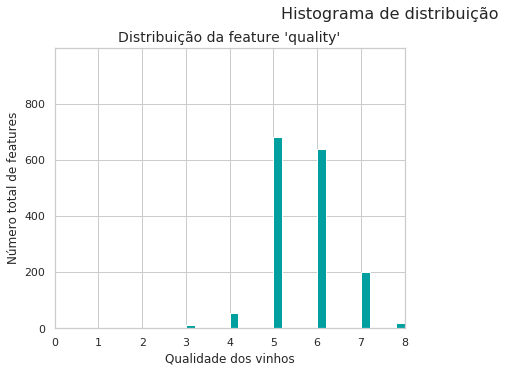

In [22]:
# Quarteto de anscombe: https://www.ilumeo.com.br/todos-posts/2019/06/24/mesmas-estatisticas-graficos-diferentes
# mesma média, desvio padrão e correlação (mesmo sumário estatístico)
# Como montar um histograma: https://gestaodesegurancaprivada.com.br/histograma-de-frequencia-conceito/    
    import seaborn as sns
    import matplotlib.pyplot as plt 
    
    sns.set()
    sns.set_style('whitegrid')
    fig = plt.figure(figsize = (11,5));
    ax = fig.add_subplot(1, 2, 1)
    ax.hist(dados['quality'], bins=25, color = '#00A0A0')
    ax.set_title("Distribuição da feature '%s'"%('quality'), fontsize = 14)
    ax.set_xlabel("Qualidade dos vinhos")
    ax.set_ylabel("Número total de features")
    ax.set_ylim((0, 1000))
    ax.set_xlim((0, 8))
    ax.set_yticks([0, 200, 400, 600, 800])
    fig.suptitle('Histograma de distribuição', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()

In [23]:
def grafico_distribuicao(dados, nome_caracteristica):
    """
    Código da vizualização para mostrar distribuições das caracteristicas ou features
    """
    
    sns.set()
    sns.set_style('whitegrid')
    fig = plt.figure(figsize = (11,5));
    ax = fig.add_subplot(1, 2, 1)
    ax.hist(dados[nome_caracteristica], bins=25, color = '#00A0A0')
    ax.set_title("Distribuição da feature '%s'"%(nome_caracteristica), fontsize = 14)
    ax.set_xlabel("Qualidade dos vinhos")
    ax.set_ylabel("Número total de features")
    ax.set_ylim((0, 1000))
    ax.set_xlim((0, 8))
    ax.set_yticks([0, 200, 400, 600, 800])
    fig.suptitle('Histograma de distribuição', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()

/home/cassia/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


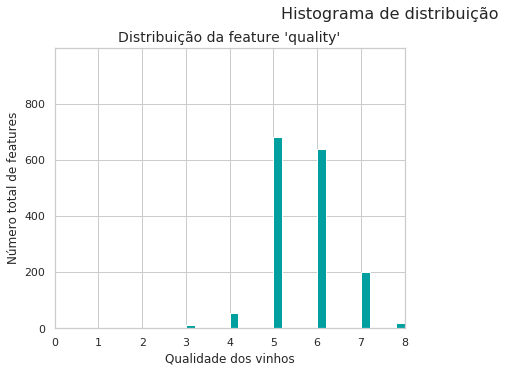

In [24]:
# visualizando dados contínuos enviesados nos dados originais
grafico_distribuicao(dados, 'quality')

Podemos ver que a maioria dos vinhos possuem qualidade média entre 5 e 6.

Vinhos com alta qualidade estão em 200 para baixo enquanto pouquíssimos vinhos são de baixa qualidade. 

Como queremos predizer a qualidade dos vinhos, iremos extrair a última coluna e guardá-la separadamente.

## 2. Explorando relacionamentos entre features

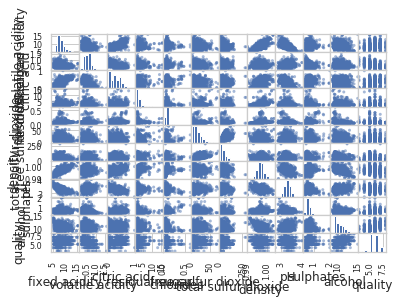

In [63]:
# Documentação do pandas
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
pd.plotting.scatter_matrix(dados);
# pd.plotting.scatter_matrix(dados, figsize=(40,40), diagonal='hist');
# explicação show de KDE ou densidade de estimativa de kernel: https://mathisonian.github.io/kde/
# pd.plotting.scatter_matrix(dados, alpha=0.3, figsize=(40,40), diagonal='kde');
# site sobre distribuições: https://www.voitto.com.br/blog/artigo/distribuicao-normal

In [26]:
# Correlações (ou co dependencias) são úteis pois podem indicar
# um relacionamento preditivo que pode ser explorado na prática
# animacao com correlacao: https://rpsychologist.com/d3/correlation/
correlacao = dados.corr()

In [27]:
correlacao

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


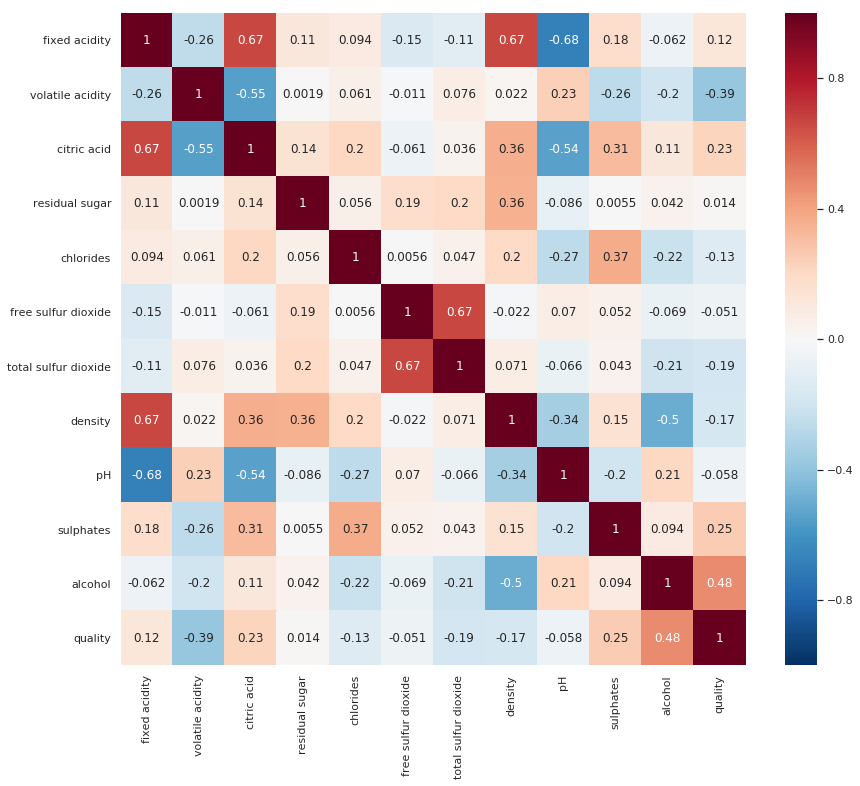

In [28]:
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(correlacao, annot=True, linewidths=0, vmax=1, vmin=-1, cmap='RdBu_r')

In [29]:
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

#sabendo o nome das colunas
dados.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

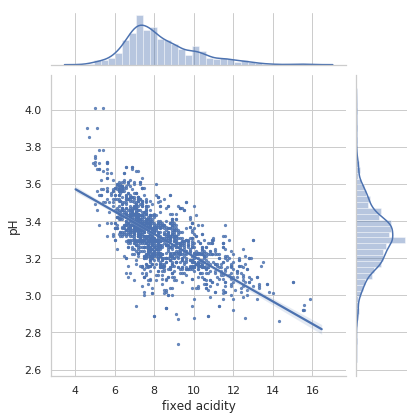

In [74]:
# criando um novo dataframe contendo apenas o ph e as colunas de acidez fixa para visualizar suas co relacoes
acidezfixa_ph = dados[['pH', 'fixed acidity']]

#inicializando um gráfico com as duas colunas do dataframe chamado joint-grid
# esse gráfico é a junção de um gráfico de duas variáveis (bi variado) com gráficos na margem (marginais) de cada variável (uni variado)
grid_acidezfixa_ph = sns.JointGrid(x='fixed acidity', y='pH', data=acidezfixa_ph, height=6)
# desenhamos uma regressão no grid
# scatter_kws são parametros adicionais que passamos para a dispersao - scatterplot
# regplot é de regressao
regressao_acidezfixa_ph = grid_acidezfixa_ph.plot_joint(sns.regplot, scatter_kws={'s':5})
# desenhamos uma distribuição das features no mesmo grid
grafico_acidezfixa_ph = regressao_acidezfixa_ph.plot_marginals(sns.distplot)

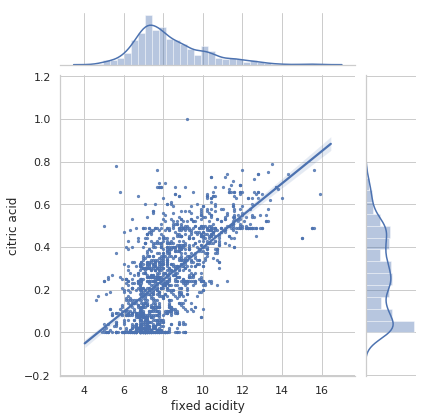

In [71]:
acidezfixa_acidocitrico = dados[['citric acid', 'fixed acidity']]
grid_acidezfixa_acidocitrico = sns.JointGrid(x='fixed acidity', y='citric acid', data=acidezfixa_acidocitrico, height=6)
regressao_acidezfixa_acidocitrico = grid_acidezfixa_acidocitrico.plot_joint(sns.regplot, scatter_kws={'s': 5})
grafico_acidezfixa_acidocitrico = regressao_acidezfixa_acidocitrico.plot_marginals(sns.distplot)

In [ ]:
## acidezfixa_densidade = dados[['density', 'fixed acidity']]
grid_acidezfixa_densidade = sns.JointGrid(x='fixed acidity', y='density', data=acidezfixa_densidade, height=6)
regressao_acidezfixa_densidade = grid_acidezfixa_densidade.plot_joint(sns.regplot, scatter_kws={'s': 10})
grafico_acidezfixa_densidade = regressao_acidezfixa_densidade.plot_marginals(sns.distplot)

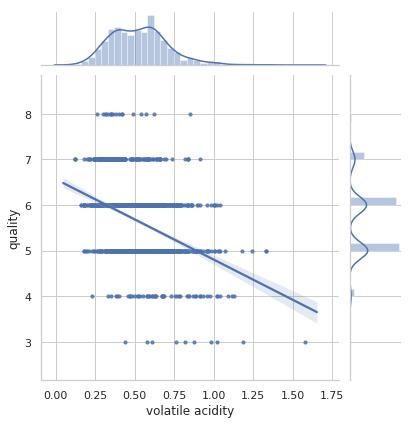

In [33]:
acidezvolatil_qualidade = dados[['quality', 'volatile acidity']]
grid_acidezvolatil_qualidade = sns.JointGrid(x='volatile acidity', y='quality', data=acidezvolatil_qualidade, height=6)
regressao_acidezvolatil_qualidade = grid_acidezvolatil_qualidade.plot_joint(sns.regplot, scatter_kws={'s': 10})
grafico_acidezvolatil_qualidade = regressao_acidezvolatil_qualidade.plot_marginals(sns.distplot)

Text(0.5, 1.0, 'Qualidade versus Acidez Volátil')

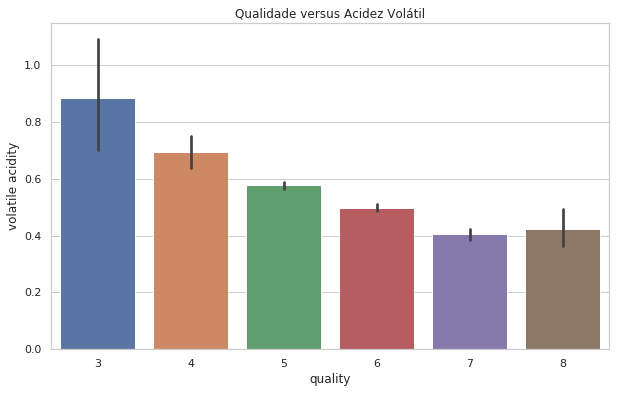

In [34]:
# podemos visualizar melhor os relacionamentos de valores discretos com um gráfico de barras

fig, axs = plt.subplots(ncols=1, figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=acidezvolatil_qualidade, ax=axs)
plt.title('Qualidade versus Acidez Volátil')

# plt.tight_layout()
# plt.show()
# plt.gcf().clear

Podemos ver que uma qualidade mais alta é relacionada com um nível menor de acidez volátil. Sabemos que a acidez volátil é um indicador de que algo pode ter estragado e estar com aromas desagradáveis, então aromas agradáveis estão relacionados a vinhos com melhor qualidade. O que vemos nesse gráfico está consistente com o nosso conhecimento sobre o domíno dos dados.

Text(0.5, 1.0, 'Qualidade versus Alcool')

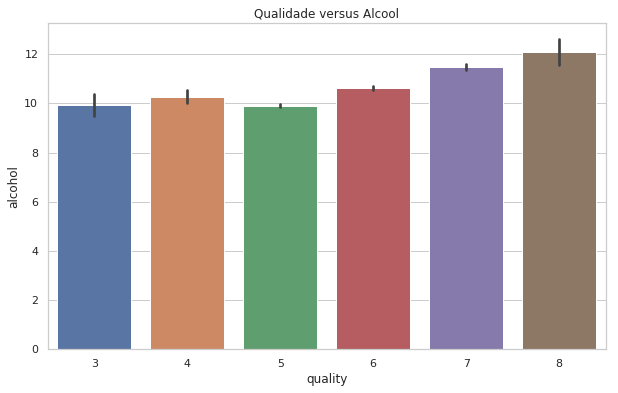

In [35]:
qualidade_alcool = dados[['quality', 'alcohol']]
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=qualidade_alcool, ax=axs)
plt.title('Qualidade versus Alcool')

# plt.tight_layout()
# plt.show()
# plt.gcf().clear()

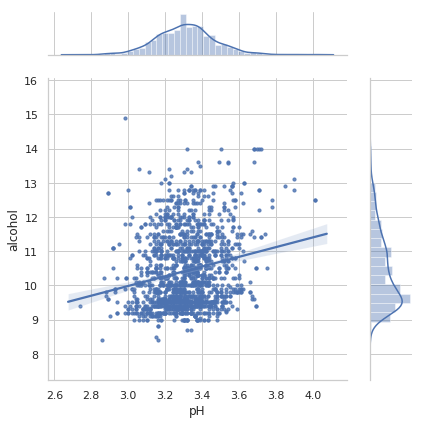

<Figure size 432x288 with 0 Axes>

In [36]:
#TODO: Seleciona quaisquer duas features e veja suas relações
primeira_feature = 'pH'
segunda_feature = 'alcohol'
grafico_bivariado = dados[[primeira_feature, segunda_feature]]

g = sns.JointGrid(x=primeira_feature, y=segunda_feature, data=grafico_bivariado, height=6)
g = g.plot_joint(sns.regplot, scatter_kws={'s': 10})
g = g.plot_marginals(sns.distplot)

# fig, axs = plt.subplots(ncols=1,figsize=(10,6))
# sns.barplot(x=primeira_feature, y=segunda_feature, data=grafico_bivariado, ax=axs)
# plt.title('pH versus Alcool')

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [37]:
# identificando pontos fora da curva
# saber se os dados possuem outliers é importante pois eles enviesam os nosso dados, atrapalhando a nossa análise
# usaremos o Método de Tukey para a identifição dos outliers

# Encontrando os pontos com valores extremamente altos ou baixos para cada feature
for feature in dados.keys():
    
    # Calculando Q1 (25° percentil dos dados) para a feature escolhida
    Q1 = np.percentile(dados[feature], q=25)
    
    # Calculando Q3 (75° percentil dos dados) para a feature escolhida
    Q3 = np.percentile(dados[feature], q=75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    # Usando a extensão do interquartil como um intervalo (step) para calcular os outliers (1.5 vezes a extensão do interquartil)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Mostrando os outliers
    print("Pontos considerados outliers para a feature '{}':".format(feature))
    display(dados[~((dados[feature] >= Q1 - step) & (dados[feature] <= Q3 + step))])
    
# OPTIONAL: Selecionando os indices para os pontos que queremos remover
outliers  = []

# removendo os outliers, se especificados
bons_dados = dados.drop(dados.index[outliers]).reset_index(drop = True)

Pontos considerados outliers para a feature 'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
328,13.4,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
347,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6


Pontos considerados outliers para a feature 'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
120,7.3,1.070,0.09,1.70,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
134,7.9,1.040,0.05,2.20,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6
199,6.9,1.090,0.06,2.10,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3


Pontos considerados outliers para a feature 'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


Pontos considerados outliers para a feature 'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.200000,5
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.200000,5
18,7.4,0.590,0.08,4.40,0.086,6.0,29.0,0.99740,3.38,0.50,9.000000,4
33,6.9,0.605,0.12,10.70,0.073,40.0,83.0,0.99930,3.45,0.52,9.400000,6
35,7.8,0.645,0.00,5.50,0.086,5.0,18.0,0.99860,3.40,0.55,9.600000,6
39,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5
55,7.7,0.620,0.04,3.80,0.084,25.0,45.0,0.99780,3.34,0.53,9.500000,5


Pontos considerados outliers para a feature 'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
17,8.1,0.560,0.28,1.70,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
42,7.5,0.490,0.20,2.60,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6
81,7.8,0.430,0.70,1.90,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
83,7.3,0.670,0.26,1.80,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
106,7.8,0.410,0.68,1.70,0.467,18.0,69.0,0.99730,3.08,1.31,9.3,5
109,8.1,0.785,0.52,2.00,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5


Pontos considerados outliers para a feature 'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
57,7.5,0.630,0.12,5.10,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,5
396,6.6,0.735,0.02,7.90,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
400,6.6,0.735,0.02,7.90,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
497,7.2,0.340,0.32,2.50,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5
522,8.2,0.390,0.49,2.30,0.099,47.0,133.0,0.99790,3.38,0.99,9.8,5
584,11.8,0.330,0.49,3.40,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,7
634,7.9,0.350,0.21,1.90,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5
678,8.3,0.780,0.10,2.60,0.081,45.0,87.0,0.99830,3.48,0.53,10.0,5


Pontos considerados outliers para a feature 'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
90,7.9,0.520,0.26,1.9,0.079,42.0,140.0,0.99640,3.23,0.54,9.5,5
91,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
92,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
130,8.0,0.745,0.56,2.0,0.118,30.0,134.0,0.99680,3.24,0.66,9.4,5
145,8.1,0.670,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5


Pontos considerados outliers para a feature 'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
294,13.3,0.340,0.52,3.20,0.094,17.0,53.0,1.00140,3.05,0.81,9.500000,6
324,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.200000,6
325,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.200000,6
353,13.5,0.530,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.000000,5
354,6.1,0.210,0.40,1.40,0.066,40.5,165.0,0.99120,3.25,0.59,11.900000,6
364,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7
366,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7
374,14.0,0.410,0.63,3.80,0.089,6.0,47.0,1.00140,3.01,0.81,10.800000,6


Pontos considerados outliers para a feature 'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
151,9.2,0.520,1.00,3.40,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
268,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
276,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
544,14.3,0.310,0.74,1.80,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
554,15.5,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5


Pontos considerados outliers para a feature 'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
43,8.1,0.660,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1,4
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
91,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6


Pontos considerados outliers para a feature 'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7
1114,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6
1132,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.99330,3.38,0.88,13.600000,7
1228,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8


Pontos considerados outliers para a feature 'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.350,0.46,3.60,0.078,15.0,37.0,0.99730,3.35,0.86,12.80,8
278,10.3,0.320,0.45,6.40,0.073,5.0,13.0,0.99760,3.23,0.82,12.60,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.90,8
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.80,8
455,11.3,0.620,0.67,5.20,0.086,6.0,19.0,0.99880,3.22,0.69,13.40,8
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
481,9.4,0.300,0.56,2.80,0.080,6.0,17.0,0.99640,3.15,0.92,11.70,8
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
498,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3


## Usando Machine Learning para prever a qualidade dos vinhos

In [38]:
# aplicando transformações para converter nosso problema de regressão em um problema de classificação
# definindo partes para categorias. 1-4 será má qualidade, 5-6 será qualidade média, 7-10 será qualidade alta
categorias_qualidade = [1,4,6,10]

# 0 para baixa qualidade, 1 para média, 2 para boa qualidade
classificacoes_qualidade = [0,1,2]
dados['quality_categorical'] = pd.cut(dados['quality'], bins=categorias_qualidade, labels=classificacoes_qualidade, include_lowest=True)

# mostrando as duas primeiras colunas
display(dados.head(n=2))

# dividindo os dados em features e classificacoes
qualidade_bruto = dados['quality_categorical']
caracteristicas_bruto = dados.drop(['quality', 'quality_categorical'], axis=1)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [39]:
#training labels
qualidade_bruto.head(5)

0    1
1    1
2    1
3    1
4    1
Name: quality_categorical, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [40]:
# training features
caracteristicas_bruto.head(5)
caracteristicas_bruto.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [41]:
type(caracteristicas_bruto)

pandas.core.frame.DataFrame

## Treinando modelos, escolhendo, predizendo

In [42]:
# misturando e dividindo o nosso dataset em sbconjuntos de treino e teste

from sklearn.model_selection import train_test_split

# dividindo as caracteristicas e os dados de entrada entre treino e teste
# converter para numpy array para evitar erro de CategoricalDType
# https://stackoverflow.com/questions/55562121/how-to-fix-typeerror-object-of-type-categoricaldtype-has-no-len-problem-i
X_treino, X_teste, y_treino, y_teste = train_test_split(np.array(caracteristicas_bruto), 
                                                        np.array(qualidade_bruto), 
                                                        test_size=0.2, random_state=0)

# vendo os resultados da divisão
print('Treino tem {} amostras.'.format(X_treino.shape[0]))
print('Teste tem {} amostras.'.format(X_teste.shape[0]))

Treino tem 1279 amostras.
Teste tem 320 amostras.


In [43]:
from sklearn.metrics import fbeta_score, accuracy_score 

def treino_predicao_avaliacao(algoritmo, amostra_de_treino, X_treino, y_treino, 
                             X_teste, y_teste):
    resultados = {}
    
    inicio_treino = time()
    algoritmo = algoritmo.fit(X_treino[:amostra_de_treino], y_treino[:amostra_de_treino])
    fim_treino = time()
    
    resultados['train_time'] = fim_treino - inicio_treino
    
    inicio_teste = time()
    predicoes_treino = algoritmo.predict(X_treino[:300])
    predicoes_teste = algoritmo.predict(X_teste)
    fim_teste = time()
    
    resultados['predict_time'] = fim_teste - inicio_teste
    
    resultados['accuracy_train'] = accuracy_score(y_treino[:300], predicoes_treino)
    resultados['accuracy_test'] = accuracy_score(y_teste, predicoes_teste)
    
    resultados['f1_train'] = fbeta_score(y_treino[:300], predicoes_treino, beta=0.5,
                                        average='micro')
    resultados['f1_test'] = fbeta_score(y_teste, predicoes_teste, beta=0.5, average='micro')
    
    print("{} treinado em {} amostras.".format(algoritmo.__class__.__name__, 
                                              amostra_de_treino))
    return resultados

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf_gaussiano = GaussianNB()
clf_arvores = DecisionTreeClassifier(max_depth=None, random_state=None)
clf_floresta = RandomForestClassifier(max_depth=None, random_state=None)

amostra_100_porcento = len(y_treino)
amostra_10_porcento = int(len(y_treino)*10/100)
amostra_1_porcento = int(len(y_treino)*1/100)

resultados_clfs = {}

for classificador in [clf_gaussiano, clf_arvores, clf_floresta]:
    nome_clf = classificador.__class__.__name__ 
    resultados_clfs[nome_clf] = {}
    
    for i, amostras in enumerate([amostra_1_porcento, amostra_10_porcento, amostra_100_porcento]):
        resultados_clfs[nome_clf][i] = treino_predicao_avaliacao(
            classificador, amostras, X_treino, y_treino, X_teste, y_teste)
        

GaussianNB treinado em 12 amostras.
GaussianNB treinado em 127 amostras.
GaussianNB treinado em 1279 amostras.
DecisionTreeClassifier treinado em 12 amostras.
DecisionTreeClassifier treinado em 127 amostras.
DecisionTreeClassifier treinado em 1279 amostras.
RandomForestClassifier treinado em 12 amostras.
RandomForestClassifier treinado em 127 amostras.
RandomForestClassifier treinado em 1279 amostras.


/home/cassia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
resultados_clfs

{'GaussianNB': {0: {'train_time': 0.0008287429809570312,
   'predict_time': 0.0005888938903808594,
   'accuracy_train': 0.8266666666666667,
   'accuracy_test': 0.85,
   'f1_train': 0.8266666666666667,
   'f1_test': 0.85},
  1: {'train_time': 0.0013170242309570312,
   'predict_time': 0.0006763935089111328,
   'accuracy_train': 0.8433333333333334,
   'accuracy_test': 0.8,
   'f1_train': 0.8433333333333334,
   'f1_test': 0.8},
  2: {'train_time': 0.0012362003326416016,
   'predict_time': 0.0006623268127441406,
   'accuracy_train': 0.77,
   'accuracy_test': 0.7625,
   'f1_train': 0.77,
   'f1_test': 0.7625}},
 'DecisionTreeClassifier': {0: {'train_time': 0.0032815933227539062,
   'predict_time': 0.00031566619873046875,
   'accuracy_train': 0.8233333333333334,
   'accuracy_test': 0.821875,
   'f1_train': 0.8233333333333334,
   'f1_test': 0.821875},
  1: {'train_time': 0.001157522201538086,
   'predict_time': 0.0002429485321044922,
   'accuracy_train': 0.8433333333333334,
   'accuracy_test':

In [46]:
import matplotlib.patches as mpatches
import matplotlib.cm as cm

def grafico_performance_classificador(resultados_clfs):
    """
    Código para visualizar os resultados de vários algoritmos (modelos).
    
    entradas:
      - resultados_clfs: uma lista de dicionários com resultados de treino_predicao_avaliacao.
    """
  
    # criando figura
    sns.set()
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(2, 3, figsize = (17,12))
    
    # constantes
    bar_width = 0.3
    colors = ['#e55547', '#4e6e8e', '#2ecc71']
    
    # loop para plotar quatro gráficos
    for k, algoritmo in enumerate(resultados_clfs.keys()):
        for j, metric in enumerate(['train_time', 'accuracy_train', 'f1_train', 'predict_time', 'accuracy_test', 'f1_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, resultados_clfs[algoritmo][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Tamanho do treino")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # adicionando legenda nos eixos y
    ax[0, 0].set_ylabel("Tempo (segundos)")
    ax[0, 1].set_ylabel("Acurácia")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Tempo (segundos)")
    ax[1, 1].set_ylabel("Acurácia")
    ax[1, 2].set_ylabel("F-score")
    
    # adicionando titulos
    ax[0, 0].set_title("Tempo de treino")
    ax[0, 1].set_title("Acurácia no treino")
    ax[0, 2].set_title("F-score no treino")
    ax[1, 0].set_title("Tempo de predição")
    ax[1, 1].set_title("Acurácia no teste")
    ax[1, 2].set_title("F-score no teste")
    
    # colocando limites para as pontuações do eixo y
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # criando espaço para a legenda
    patches = []
    for i, algoritmo in enumerate(resultados_clfs.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = algoritmo))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # estética
    plt.suptitle("Métricas de performance dos três modelos", fontsize=16, y=1.10)
    plt.tight_layout(pad=1, w_pad=2, h_pad=5.0)
    plt.show()

/home/cassia/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


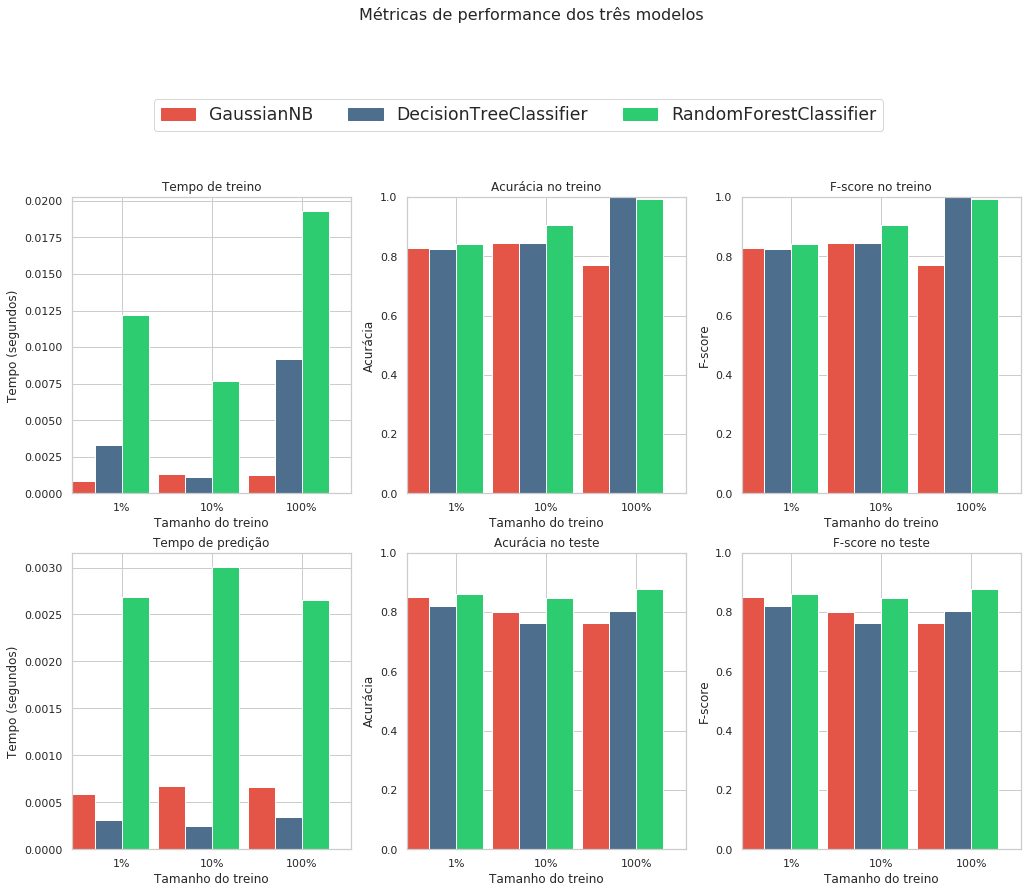

In [47]:
grafico_performance_classificador(resultados_clfs)

## Entendendo as caracteristicas importantes (features)

In [48]:
def grafico_importancia_carateristicas(importancia_caracteristicas, X_treino, y_treino):
    
    # mostrando as cinco features mais importantes
    indices = np.argsort(importancia_caracteristicas)[::-1]
    colunas = X_treino.columns.values[indices[:11]]
    valores = importancia_caracteristicas[indices][:11]

    sns.set()
    sns.set_style('whitegrid')

    # criando o gráfico
    fig = plt.figure(figsize = (12,5))
    plt.title('Pesos normalizados para as primeiras cinco características que mais influenciam na predição', fontsize = 16)
    plt.bar(np.arange(11), valores, width = 0.2, align='center', label = 'Importância')
    plt.xticks(np.arange(11), colunas)
    plt.xlim((-0.5, 4.5))
    plt.ylabel('Peso', fontsize = 12)
    plt.xlabel('Característica', fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

In [49]:
# importando um modelo que tenha 'feature_importances_'
modelo = RandomForestClassifier(max_depth=None, random_state=None)

# print('Como numpy', X_treino[0])
X_treino = pd.DataFrame(X_treino)
X_treino.columns = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
# print('Como DF', X_treino.head(5))
# treinando o modelo usando .fit(X_train, y_train)
modelo = modelo.fit(X_treino, y_treino)

# extraindo a importancia das caracteristicas com .feature_importances_ 
importancia_caracteristicas = modelo.feature_importances_

#print(y_treino.columns)
print(importancia_caracteristicas)

[0.07604638 0.12256233 0.07063657 0.077165   0.09079124 0.06325096
 0.0835144  0.10872114 0.05727548 0.10940268 0.14063382]


/home/cassia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


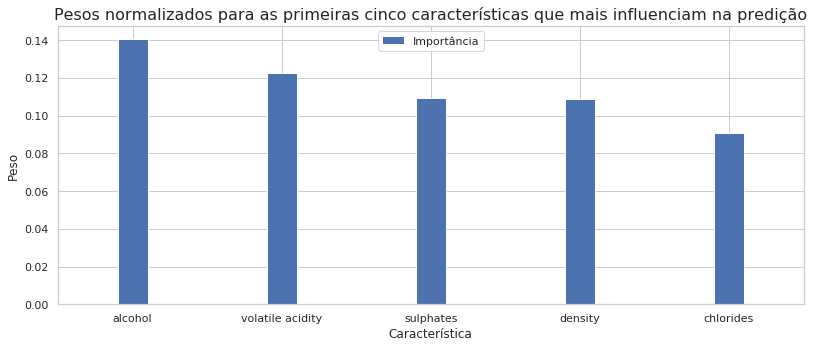

In [50]:
# fazendo o gráfico
grafico_importancia_carateristicas(importancia_caracteristicas, X_treino, y_treino)

## Fazendo otimizacao com grid search

In [51]:
# fazendo o tuning de hiperparametros com grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# inicializando o classificador
clf = RandomForestClassifier(max_depth=None, random_state=123)

"""
n_estimators: número de árvores na floresta
max_features: número de características que vamos considerar para procurar a melhor divisão
max_depth: profundidade máxima da árvore
"""
parametros = {'n_estimators': [5, 25, 30], 'max_features':[3,2,8, None], 'max_depth': [5,8,10, None]}

# fbeta com make_scorer para termos pontuacoes
pontuacao = make_scorer(fbeta_score, beta=0.5, average="micro")
objeto_grid = GridSearchCV(clf, parametros, scoring=pontuacao)
grid_fit = objeto_grid.fit(X_treino, y_treino)

melhor_clf = grid_fit.best_estimator_

predicoes = (clf.fit(X_treino, y_treino)).predict(X_teste)
melhores_predicoes = melhor_clf.predict(X_teste)

# Antes e depois das pontuacoes
print("Modelo sem otimização\n------")
print("Acurácia do teste: {:.4f}".format(accuracy_score(y_teste, predicoes)))
print("F-score do teste: {:.4f}".format(fbeta_score(y_teste, predicoes, beta = 0.5, average="micro")))
print("\nModelo otimizado\n------")
print(melhor_clf)
print("\nAcurácia final do teste: {:.4f}".format(accuracy_score(y_teste, melhores_predicoes)))
print("F-score final do teste: {:.4f}".format(fbeta_score(y_teste, melhores_predicoes, beta = 0.5,  average="micro")))

/home/cassia/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Modelo sem otimização
------
Acurácia do teste: 0.8750
F-score do teste: 0.8750

Modelo otimizado
------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

Acurácia final do teste: 0.8781
F-score final do teste: 0.8781


/home/cassia/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Prevendo outros dados

In [52]:
"""Colocando entradas para teste nesta ordem: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide,
total sulfur dioxide, density, pH, sulphates, alcohol

"""
testando_vinhos = [[8, 0.2, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 9.5],
            [8, 0, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 1 ],
            [4.4, 2, 0.00, 1.0, 0.076, 10.0, 30.0, 0.9978, 3.01, 0.06, 0.2]]
               
# mostrar predições
for i, qualidade in enumerate(melhor_clf.predict(testando_vinhos)):
    print("A qualidade do vinho {} é: {}".format(i+1, qualidade))

A qualidade do vinho 1 é: 1
A qualidade do vinho 2 é: 1
A qualidade do vinho 3 é: 0
